In [1]:
import pickle
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage import data, exposure
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
#define function to unpickle databatch
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
#check raw feature map dimension
data_1 = unpickle("data_batch_1")
print(np.shape(data_1[b'data']))
labels=data_1[b'labels']
#Save ground truth labels for further performance validation
print(len(labels))

(10000, 3072)
10000


b'batch_label'
b'labels'
b'data'
b'filenames'


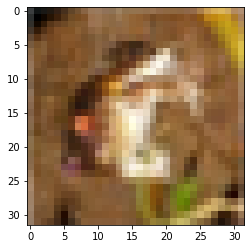

In [4]:
#Sample image display
for i in data_1.keys():
    print(i)
image1 = data_1[b'data'][0].reshape((3, 32, 32)).T

plt.imshow(image1)

10000


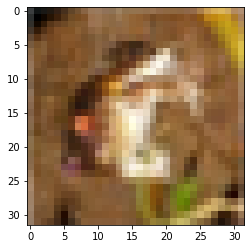

In [5]:
#Reconstructed_image into 32 x 32 x 3 shape for further preprocessing steps
reconstructed_image=[]
for i in range(len(data_1[b'data'])):
    reconstructed_image.append(data_1[b'data'][i].reshape(3,32,32).T)
#check dimension of reconstructed image and whether the image still corresponds to original image by checking the image directly
print(len(reconstructed_image))
plt.imshow(reconstructed_image[0])

In [6]:
#Preprocessing step : HOG
#Extract histogram of oriented gradients (HOG) for a give image

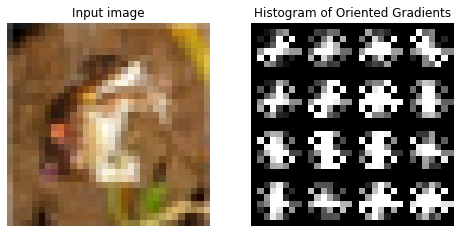

In [7]:
#Sample display using HOG, fd is the feature vector and hog_image is used to display
fd, hog_image = hog(reconstructed_image[0], orientations=9, pixels_per_cell=(8, 8),
                    cells_per_block=(4, 4), visualize=True, multichannel=True)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(reconstructed_image[0], cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

In [8]:
#check dimensionality of fd and hog_image
print(hog_image.shape)
print(fd.shape)
print(fd)

(32, 32)
(144,)
[0.06089285 0.07482404 0.11215648 0.05389675 0.07625778 0.0088498
 0.00660988 0.00862848 0.02147397 0.05537297 0.05192639 0.0477177
 0.042337   0.05341488 0.03193654 0.00800954 0.03176018 0.02718245
 0.03427119 0.02019579 0.18044727 0.10666002 0.07831716 0.01419182
 0.04594476 0.08080309 0.02754499 0.06573669 0.         0.01876494
 0.         0.06899843 0.05846448 0.08318956 0.15851205 0.05214902
 0.08581406 0.06023659 0.07325589 0.01397117 0.07022308 0.02086167
 0.02517325 0.01522563 0.01910445 0.1987979  0.16877502 0.21057384
 0.17728849 0.07754859 0.03207248 0.00718872 0.03266013 0.04875146
 0.06587947 0.12427746 0.21057384 0.11191152 0.16699646 0.0732064
 0.09450351 0.04964362 0.06647263 0.09147768 0.03356768 0.03293012
 0.01895368 0.04756631 0.02406587 0.03165677 0.06698104 0.09862844
 0.08453947 0.02391548 0.05612294 0.00239715 0.03397411 0.02931728
 0.09144855 0.07124739 0.08808153 0.18804751 0.0767378  0.02966006
 0.00774737 0.03725956 0.0757003  0.05092617 0.14

In [9]:
#preprocess data with hog, save hog feature vector in hog_image
#each row is a (n_blocks_row, n_blocks_col, n_cells_row, n_cells_col, n_orient) ndarray
hog_image=[]
for i in range(len(reconstructed_image)):
    output=hog(image=reconstructed_image[i],orientations=8,pixels_per_cell=(4,4),cells_per_block=(8,8))
    hog_image.append(output)

In [10]:
#convert feature list into array shape
hog_map=np.asarray(hog_image)
print(hog_map.shape)

(10000, 512)


In [125]:
#compare performance between raw feature map and hog feature map
KM_raw=KMeans(n_clusters=10,max_iter=3000,random_state=0,n_init=50)
KM_raw.fit(data_1[b'data'])

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=3000,
       n_clusters=10, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [131]:
#KMeans with hog feature map
KM=KMeans(n_clusters=10,max_iter=3000,random_state=0,n_init=50)
KM.fit(hog_map)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=3000,
       n_clusters=10, n_init=50, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [133]:
predict=KM.labels_
print('hog feature map performance')
print('homogeneity_score is')
print(metrics.homogeneity_score(labels, predict))
print('completeness_score is')
print(metrics.completeness_score(labels, predict))
print('V-measure is')
print(metrics.v_measure_score(labels, predict))
print('adjusted Rand score is')
print(metrics.adjusted_rand_score(labels, predict))
print('adjusted mutual info score is')
print(metrics.adjusted_mutual_info_score(labels, predict))

predict_raw=KM_raw.labels_
print('raw feature map performance')
print('homogeneity_score is')
print(metrics.homogeneity_score(labels, predict_raw))
print('completeness_score is')
print(metrics.completeness_score(labels, predict_raw))
print('V-measure is')
print(metrics.v_measure_score(labels, predict_raw))
print('adjusted Rand score is')
print(metrics.adjusted_rand_score(labels, predict_raw))
print('adjusted mutual info score is')
print(metrics.adjusted_mutual_info_score(labels, predict_raw))

hog feature map performance
homogeneity_score is
0.1467913849282433
completeness_score is
0.1500339860558276
V-measure is
0.1483949739634728
adjusted Rand score is
0.07391048995730759
adjusted mutual info score is
0.14687422496685265
raw feature map performance
homogeneity_score is
0.08383091207866859
completeness_score is
0.08512538893296592
V-measure is
0.08447319161906289
adjusted Rand score is
0.04309438625161085
adjusted mutual info score is
0.08284380315035077


In [134]:
#different clustering method
#No.1 Affinity Propagation with hog_map
from sklearn.cluster import AffinityPropagation
AP=AffinityPropagation(damping=0.5,max_iter=3000,convergence_iter=15,affinity='euclidean',verbose=True)
AP.fit(hog_map)

Converged after 53 iterations.


AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=3000, preference=None, verbose=True)

In [135]:
predict_AP=AP.labels_
print('hog feature map performance')
print('homogeneity_score is')
print(metrics.homogeneity_score(labels, predict_AP))
print('completeness_score is')
print(metrics.completeness_score(labels, predict_AP))
print('V-measure is')
print(metrics.v_measure_score(labels, predict_AP))
print('adjusted Rand score is')
print(metrics.adjusted_rand_score(labels, predict_AP))
print('adjusted mutual info score is')
print(metrics.adjusted_mutual_info_score(labels, predict_AP))

hog feature map performance
homogeneity_score is
0.3697839347524396
completeness_score is
0.13987180713506558
V-measure is
0.20296974193515682
adjusted Rand score is
0.007501927028103182
adjusted mutual info score is
0.14801333194466276


In [11]:
#preprocessing step : HSV
import matplotlib.image as mping
import matplotlib
def color_histogram_hsv(im,nbin,xmin=0,xmax=255,normalized=True):
    ndim=im.ndim
    bins=np.linspace(xmin,xmax,nbin+1)
    hsv=matplotlib.colors.rgb_to_hsv(im/xmax)*xmax
    imhist,bin_edges=np.histogram(hsv[:,:,0],bins=bins,density=normalized)
    mhist=imhist * np.diff(bin_edges)    
    return mhist

In [12]:
#combine HOG and HSV together and save them in all_feature_map
all_mhist=[]
for i in range(len(data_1[b'data'])):
    mhist=color_histogram_hsv(data_1[b'data'][i].reshape((3,32,32)).T, nbin=50)
    all_mhist.append(mhist)
mhist_map=np.asarray(all_mhist)
print(mhist_map.shape)
all_feature_map=np.hstack((hog_map,mhist_map))
print(all_feature_map.shape)

(10000, 50)
(10000, 562)


In [165]:
#search for the best nbin parameter for hsv
ns = [10, 50, 100, 200, 500]
homo = 0 
comp = 0
vmeasure = 0
rds = 0
amisi = 0
index=1
for n in ns: 
    print('now in step %i' %index)
    index+=1
    all_mhist=[]
    for i in range(len(data_1[b'data'])):
        mhist=color_histogram_hsv(data_1[b'data'][i].reshape((3,32,32)).T, nbin=n)
        all_mhist.append(mhist)
    mhist_map=np.asarray(all_mhist)
    all_feature_map=np.hstack((hog_map,mhist_map))
    
    
    KM_n=KMeans(n_clusters=10,max_iter=3000,random_state=0,n_init=50)
    KM_n.fit(all_feature_map)
    predict_n=KM_n.labels_
    
    homo1 = metrics.homogeneity_score(labels, predict_n)
    comp1 = metrics.completeness_score(labels, predict_n)
    vmeasure1 = metrics.v_measure_score(labels, predict_n)
    rds1 = metrics.adjusted_rand_score(labels, predict_n)
    amisi1 = metrics.adjusted_mutual_info_score(labels, predict_n)
    if homo1 > homo:
        homo = homo1 
        n_homo_best = n
    if comp1 > comp:
        comp = comp1
        n_comp_best = n
    if vmeasure1 > vmeasure:
        vmeasure = vmeasure1 
        n_vmeasure_best = n
    if rds1 > rds:
        rds = rds1
        n_rds_best = n
    if amisi1 > amisi:
        amisi = amisi1
        n_amisi_best = n
    
    
print('hog and hsv feature map performance')
print('at n =', n_homo_best,'best homo score is:', homo)
print('at n =', n_comp_best,'best comp score is:', comp)
print('at n =', n_vmeasure_best,'best vmeasure score is:', vmeasure)
print('at n =', n_rds_best,'best rds score is:', rds)
print('at n =', n_amisi_best,'best amisi score is:', amisi)


now in step 1
now in step 2
now in step 3
now in step 4
now in step 5
hog and hsv feature map performance
at n = 50 best homo score is: 0.15809289100589052
at n = 50 best comp score is: 0.16696432878240566
at n = 50 best vmeasure score is: 0.16240755057992362
at n = 50 best rds score is: 0.08319165611972736
at n = 50 best amisi score is: 0.1608866281699723


In [168]:
#KMeans with HOG and HSV feature
KM_n=KMeans(n_clusters=10,max_iter=3000,random_state=0,n_init=50)
KM_n.fit(all_feature_map)
predict_n=KM_n.labels_
print('hog and hsv feature map performance')
print('homogeneity_score is')
print(metrics.homogeneity_score(labels, predict_n))
print('completeness_score is')
print(metrics.completeness_score(labels, predict_n))
print('V-measure is')
print(metrics.v_measure_score(labels, predict_n))
print('adjusted Rand score is')
print(metrics.adjusted_rand_score(labels, predict_n))
print('adjusted mutual info score is')
print(metrics.adjusted_mutual_info_score(labels, predict_n))

hog and hsv feature map performance
homogeneity_score is
0.15809289100589052
completeness_score is
0.16696432878240566
V-measure is
0.16240755057992362
adjusted Rand score is
0.08319165611972736
adjusted mutual info score is
0.1608866281699723


In [13]:
#Normalize the entire dataset to make sure HOG and HSV will not prevail or be discarded
from sklearn.preprocessing import Normalizer
Scaler=Normalizer()
data_train_std=Scaler.fit_transform(all_feature_map)

In [180]:
#KMeans with normalized feature map
KM_nn=KMeans(n_clusters=10,max_iter=3000,random_state=0,n_init=50)
KM_nn.fit(data_train_std)
predict_nn=KM_nn.labels_
print('hog and hsv feature map performance')
print('homogeneity_score is')
print(metrics.homogeneity_score(labels, predict_nn))
print('completeness_score is')
print(metrics.completeness_score(labels, predict_nn))
print('V-measure is')
print(metrics.v_measure_score(labels, predict_nn))
print('adjusted Rand score is')
print(metrics.adjusted_rand_score(labels, predict_nn))
print('adjusted mutual info score is')
print(metrics.adjusted_mutual_info_score(labels, predict_nn))

hog and hsv feature map performance
homogeneity_score is
0.15387020824757922
completeness_score is
0.15963375933622498
V-measure is
0.15669900436486736
adjusted Rand score is
0.07955099069663998
adjusted mutual info score is
0.15518164864585285


In [183]:
#No.1 AffinityPropagation with normalized feature map
AP_n=AffinityPropagation(damping=0.5,max_iter=3000,convergence_iter=15,affinity='euclidean',verbose=True)
AP_n.fit(data_train_std)

Converged after 110 iterations.


AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
                    damping=0.5, max_iter=3000, preference=None, verbose=True)

In [184]:
predict_AP_n=AP_n.labels_
print('hog and hsv feature map performance')
print('homogeneity_score is')
print(metrics.homogeneity_score(labels, predict_AP_n))
print('completeness_score is')
print(metrics.completeness_score(labels, predict_AP_n))
print('V-measure is')
print(metrics.v_measure_score(labels, predict_AP_n))
print('adjusted Rand score is')
print(metrics.adjusted_rand_score(labels, predict_AP_n))
print('adjusted mutual info score is')
print(metrics.adjusted_mutual_info_score(labels, predict_AP_n))

hog and hsv feature map performance
homogeneity_score is
0.37908762695921
completeness_score is
0.14316660620490015
V-measure is
0.20784011142314657
adjusted Rand score is
0.007638788903862369
adjusted mutual info score is
0.15380945379541644


In [16]:
def evaluation(predict):
    print('hog and hsv feature map performance')
    print('homogeneity_score is')
    print(metrics.homogeneity_score(labels, predict))
    print('completeness_score is')
    print(metrics.completeness_score(labels, predict))
    print('V-measure is')
    print(metrics.v_measure_score(labels, predict))
    print('adjusted Rand score is')
    print(metrics.adjusted_rand_score(labels, predict))
    print('adjusted mutual info score is')
    print(metrics.adjusted_mutual_info_score(labels, predict))

In [191]:
#No.2 AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
AC=AgglomerativeClustering(n_clusters=10,affinity='euclidean')
AC.fit(data_train_std)
predict_AC=AC.labels_
evaluation(predict_AC)

hog and hsv feature map performance
homogeneity_score is
0.14169194283897252
completeness_score is
0.16927009343201824
V-measure is
0.15425811260134537
adjusted Rand score is
0.07741787561266202
adjusted mutual info score is
0.15262912509674928


In [16]:
###No.3 SpectralClustering
#for now, this clusterin method is the best one "SpectralClustering"
from sklearn.cluster import SpectralClustering
SC=SpectralClustering(n_clusters=10,n_init=50,eigen_solver='arpack',affinity='nearest_neighbors',n_neighbors=10)
SC.fit(data_train_std)
evaluation(SC.labels_)

hog and hsv feature map performance
homogeneity_score is
0.18035815625782373
completeness_score is
0.26190334897850737
V-measure is
0.2136130075995254
adjusted Rand score is
0.11446416268834174
adjusted mutual info score is
0.2119536852704981


In [22]:
# Some extra experiments required in results
#No.1 AP with raw data
from sklearn.cluster import AffinityPropagation
AP_n=AffinityPropagation(damping=0.5,max_iter=3000,convergence_iter=15,affinity='euclidean',verbose=True)
AP_n.fit(data_1[b'data'])
evaluation(AP_n.labels_)

Converged after 45 iterations.
hog and hsv feature map performance
homogeneity_score is
0.19728269175395519
completeness_score is
0.08987337710200195
V-measure is
0.12349007160002011
adjusted Rand score is
0.009998771761980784
adjusted mutual info score is
0.09925488821639579


In [23]:
#No.1 Ap with HOG and HSV data ----get stucked
AP_n=AffinityPropagation(damping=0.5,max_iter=3000,convergence_iter=15,affinity='euclidean',verbose=True)
AP_n.fit(all_feature_map)
evaluation(AP_n.labels_)

KeyboardInterrupt: 